In [2]:
!pip install pandas numpy matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#load dataset
df = pd.read_csv('Iris.csv')

In [12]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
#delete column
df = df.drop(columns = ['Id'])

In [14]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
#display statistics
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
#display basic info about datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
#display no.of samples on each class
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Preprocessing the dataset

In [18]:
#check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
Exploratory data analysis

<Axes: >

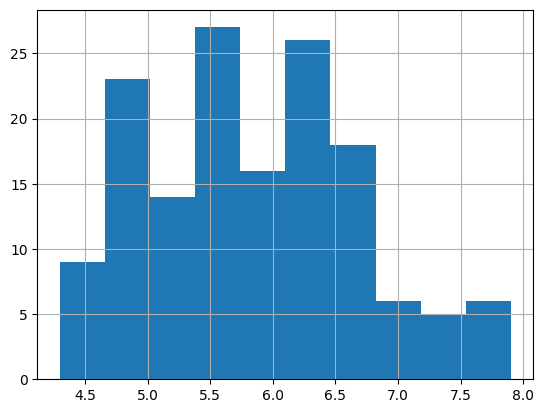

In [15]:
#histograms
df['SepalLengthCm'].hist()

<Axes: >

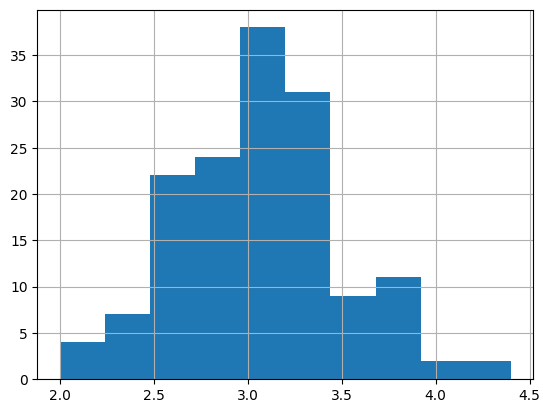

In [16]:
df['SepalWidthCm'].hist()

<Axes: >

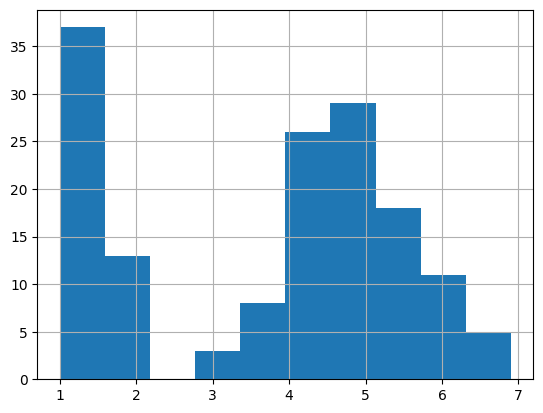

In [17]:
df['PetalLengthCm'].hist()

<Axes: >

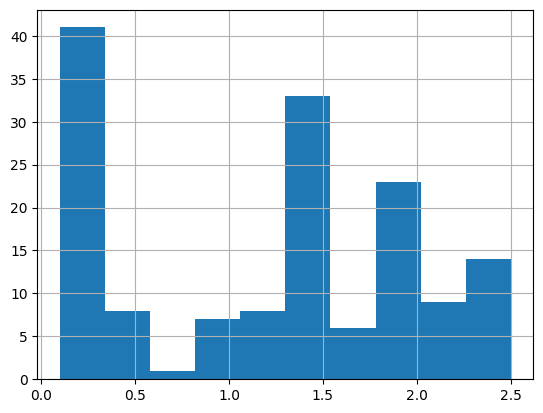

In [18]:
df['PetalWidthCm'].hist()

In [19]:
#scatterplot
colours = ['red','orange','blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

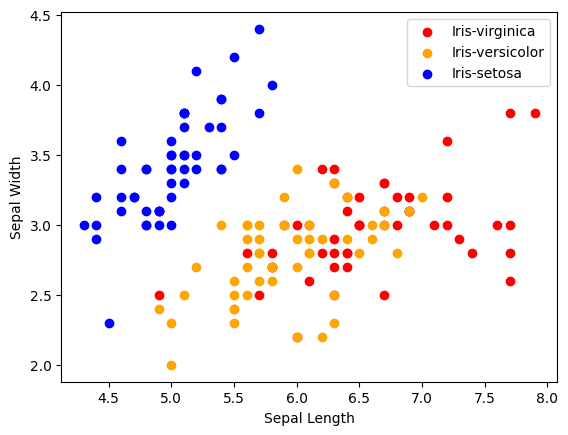

In [20]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colours[i], label=species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.legend()

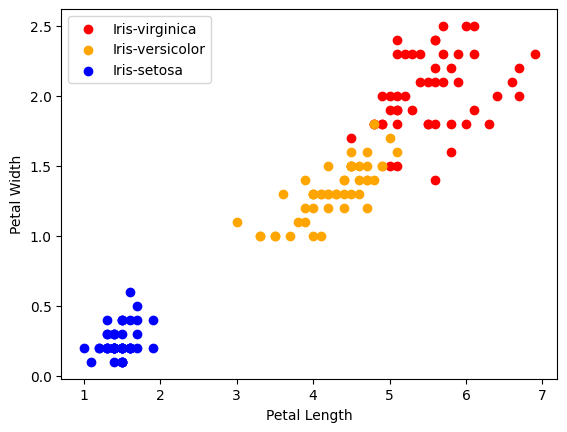

In [25]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colours[i], label=species[i])
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.legend()

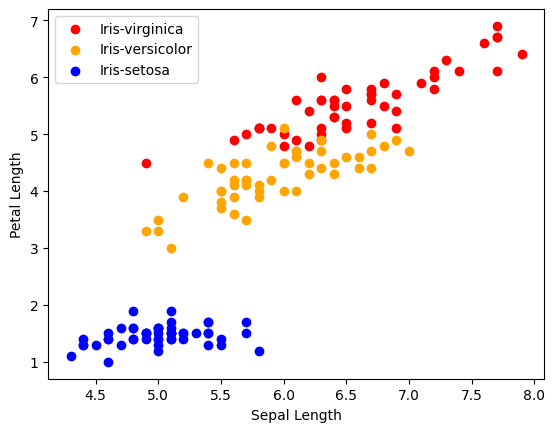

In [27]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colours[i], label=species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Petal Length")
    plt.legend()

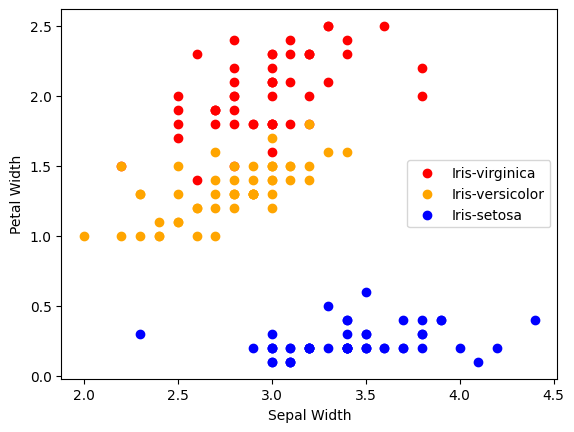

In [28]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colours[i], label=species[i])
    plt.xlabel("Sepal Width")
    plt.ylabel("Petal Width")
    plt.legend()

Coorelation matrix

This is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between 2 variables. The value is in the range of -1 to 1. If the 2 variables have high correlation, we can neglect one variable from those 2. 

In [21]:
df.corr(numeric_only=True)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

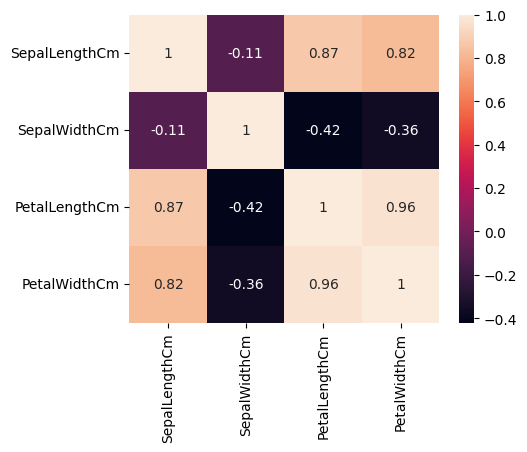

In [22]:
corr = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax)

Label encoder

In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.

Label Encoding = Converting words → numbers


In [24]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Model Training

In [26]:
from sklearn.model_selection import train_test_split
#train - 70%
#test - 30%
x = df.drop(columns=['Species']) #input (features)
y = df['Species'] #target (thing we want to predict)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30)

In [27]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [28]:
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [85]:
#print metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  95.55555555555556


In [86]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [87]:
model.fit(x_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [88]:
#print metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  95.55555555555556


In [89]:
#Decion tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [90]:
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [91]:
#print metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  93.33333333333333


Prediction

In [29]:
def predict_species(sepal_len, sepal_wid, petal_len, petal_wid):
    input_data = [[sepal_len, sepal_wid, petal_len, petal_wid]]
    prediction = model.predict(input_data)
    return prediction[0]

# Example usage
predict_species(6.2, 3.4, 5.4, 2.3)


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'Iris-virginica'